In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Audio
from keras.models import load_model
from keras.layers import Dense, LSTM, Dropout
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
        print(label)
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear
fear


In [ ]:
len(paths)

2800

In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/TESS Toronto emotional ...,fear
1,/content/drive/MyDrive/TESS Toronto emotional ...,fear
2,/content/drive/MyDrive/TESS Toronto emotional ...,fear
3,/content/drive/MyDrive/TESS Toronto emotional ...,fear
4,/content/drive/MyDrive/TESS Toronto emotional ...,fear


In [ ]:
df['label'].value_counts()

sad        800
fear       400
ps         400
happy      400
neutral    400
disgust    200
angry      200
Name: label, dtype: int64

# Data Analysis

<Axes: xlabel='label', ylabel='count'>

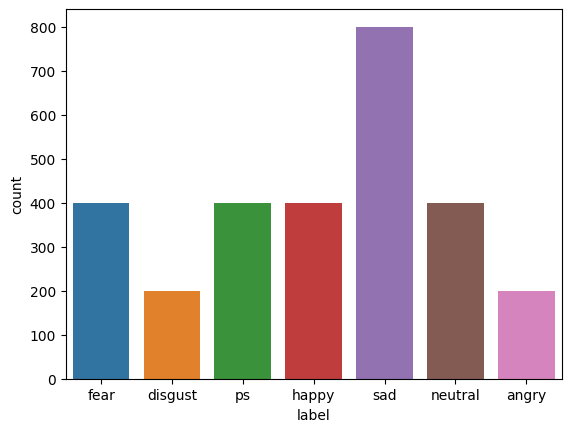

In [ ]:
sns.countplot(data=df, x='label')

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

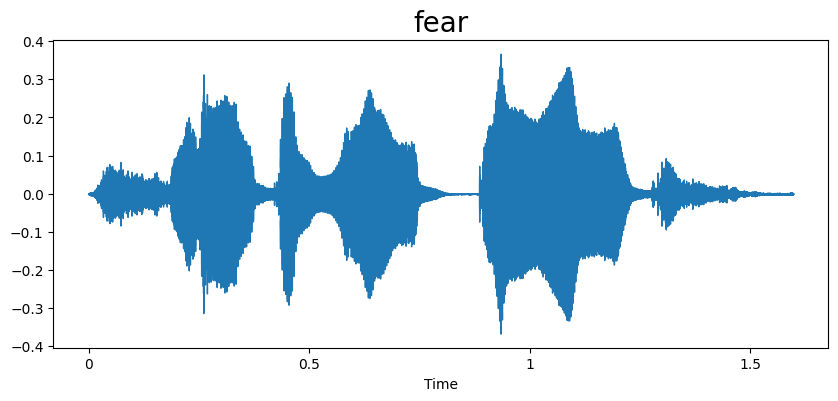

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
Audio(path)

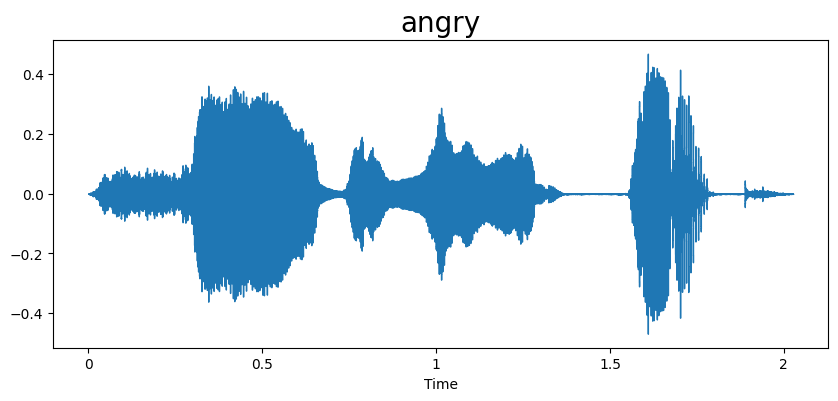

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
Audio(path)

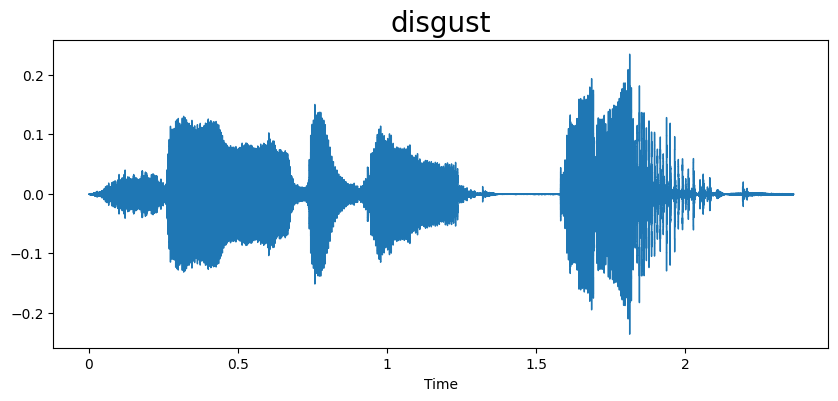

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
Audio(path)

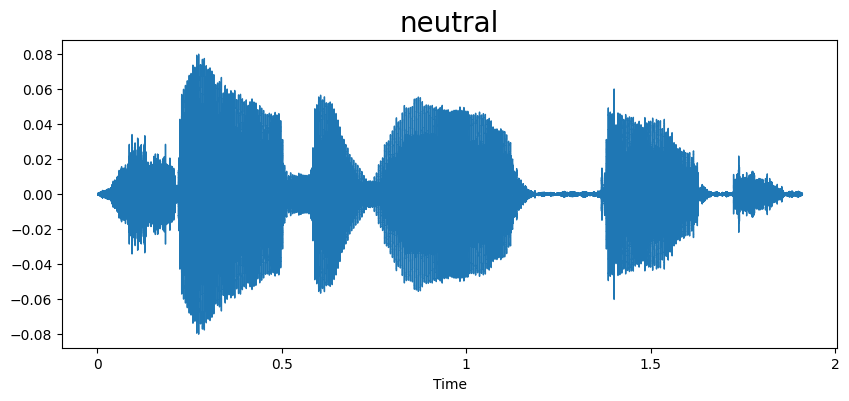

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
Audio(path)


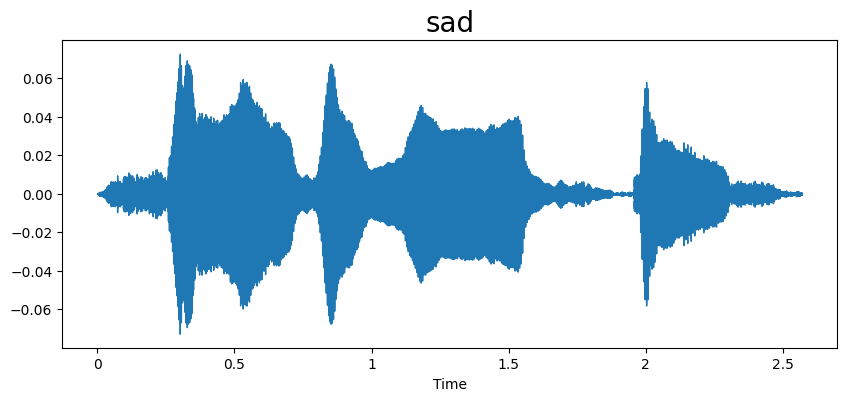

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
Audio(path)

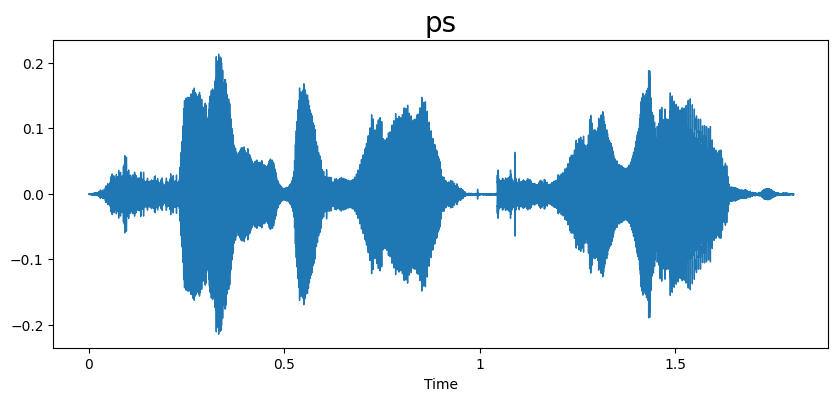

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
Audio(path)

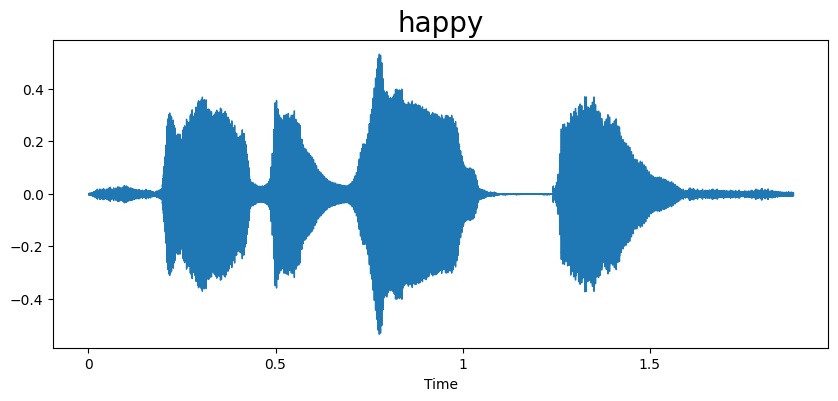

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc


In [ ]:
extract_mfcc(df['speech'][0])

array([-3.38039886e+02,  5.88138885e+01, -2.77421627e+01,  1.83836994e+01,
        2.01821327e+00, -1.68037243e+01, -1.34882593e+01,  1.89167964e+00,
       -1.07832804e+01,  7.30387688e+00, -1.44754362e+01, -3.79204178e+00,
       -3.95982891e-01, -4.45124149e-01, -2.08025527e+00, -3.68202424e+00,
       -5.79717779e+00,  6.89974451e+00,  1.08212076e-01,  1.46332903e+01,
        1.80939579e+01,  1.48965559e+01,  1.14690981e+01,  1.04433947e+01,
        1.64081872e+00,  1.10718565e+01, -4.93974835e-01,  9.21872795e-01,
        8.36143970e-01, -5.23318911e+00, -4.97550869e+00, -1.37633049e+00,
       -8.22081089e+00,  2.85191727e+00, -6.02887535e+00, -1.10829639e+00,
        1.36324847e+00,  4.71742481e-01,  5.71100175e-01,  1.43706739e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-338.0399, 58.81389, -27.742163, 18.3837, 2.0...
1       [-332.50607, 33.47497, -12.054058, 13.889634, ...
2       [-335.0441, 26.442385, -25.509163, 13.974199, ...
3       [-292.65207, 66.65692, -33.22581, -11.983398, ...
4       [-304.3613, 25.742218, -15.207388, 37.724438, ...
                              ...                        
2795    [-332.07935, 58.7289, -12.947721, 25.807829, -...
2796    [-336.45566, 42.53098, -2.9627376, 1.3677514, ...
2797    [-344.08316, 34.09715, -7.42197, 17.877493, -2...
2798    [-417.4327, 40.141663, 12.793276, 25.56683, -1...
2799    [-333.38745, 63.86062, -3.2831578, 17.142277, ...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
encoder = OneHotEncoder()
y = encoder.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

# MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(200, activation='relu'),
    Dropout(0.2),
    Dense(150, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 200)               51400     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 7)                 1

In [ ]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 6s 24ms/step - loss: 0.7633 - accuracy: 0.7250 - val_loss: 3.8528 - val_accuracy: 0.6375
Epoch 2/50
35/35 [==============================] - 0s 8ms/step - loss: 0.0881 - accuracy: 0.9754 - val_loss: 3.4994 - val_accuracy: 0.6429
Epoch 3/50
35/35 [==============================] - 0s 8ms/step - loss: 0.0442 - accuracy: 0.9862 - val_loss: 3.3190 - val_accuracy: 0.6429
Epoch 4/50
35/35 [==============================] - 0s 8ms/step - loss: 0.0426 - accuracy: 0.9866 - val_loss: 3.3573 - val_accuracy: 0.6429
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 0.0279 - accuracy: 0.9915 - val_loss: 3.0452 - val_accuracy: 0.6429
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 3.2971 - val_accuracy: 0.6429
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 0.0508 - accuracy: 0.9879 - val_loss: 3.6957 - val_accuracy: 0.6411
Epoch 8/50
35/35 [=

In [ ]:
model.evaluate(X, y)

88/88 [==============================] - 0s 3ms/step - loss: 0.8219 - accuracy: 0.9286


[0.8218715786933899, 0.9285714030265808]

In [ ]:
model.save('emotion_model.h5')

In [ ]:
loaded_model = load_model('emotion_model.h5')

# USER-input

In [ ]:
def preprocess_input(filename):
    mfcc = extract_mfcc(filename)
    return np.expand_dims(mfcc, axis=0)
def predict_emotion(filename):
    input_data = preprocess_input(filename)
    prediction = model.predict(input_data)
    emotion_label = encoder.inverse_transform(prediction)[0][0]
    return emotion_label

In [52]:
user_input_path = '/content/52-vozhombreenojado-46952.mp3'
predicted_emotion = predict_emotion(user_input_path)
print(f'The predicted emotion is: {predicted_emotion}')

1/1 [==============================] - 0s 35ms/step
The predicted emotion is: disgust


In [51]:
user_input_path = '/content/157406575-angry-man-shouting-04.wav'
predicted_emotion = predict_emotion(user_input_path)
print(f'The predicted emotion is: {predicted_emotion}')

1/1 [==============================] - 0s 111ms/step
The predicted emotion is: fear
